# Fraud Detection

## Data Analysis

In [73]:
import glob
import pandas as pd
import numpy as np

input_filenames = sorted(glob.glob('fraud_detection/*.Inputs'))
target_filenames = sorted(glob.glob('fraud_detection/*.Targets'))

df = pd.DataFrame()
for input_file, target_file in zip(input_filenames, target_filenames):
    df = df.append(pd.read_csv(input_file))
    df['fraud'] = pd.read_csv(target_file)

df.head()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
0,25.90,BELLSOUTH.NET,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,0,FL,25.90,331
1,38.85,COMCAST.NET,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,0,TX,38.85,750
2,38.85,HOTMAIL.COM,2,0,5183,19,1,0,0,0,0,1,0.0,1,1,0,0,VA,38.85,222
3,24.95,GMAIL.COM,0,0,3822,16,0,0,0,0,0,1,0.0,1,1,0,0,CA,24.95,946
4,20.72,LEVEL3.COM,3,0,3536,8,1,1,1,1,0,1,0.0,1,1,0,0,CO,20.72,805


### Dataset Profiling Report

In [74]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(output_file="ProfilingResult.html")

In [75]:
# profile

### Rows containing null values

In [76]:
df[pd.isnull(df).any(axis=1)]

,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
63375,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
6991,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63292,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
63317,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63358,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63302,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857


## Data Preprocessing

Drop highly correlated columns

In [77]:
clean_df = df.drop(columns=['hour2', 'domain1', 'total'])
clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,FL,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,TX,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,VA,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,CA,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,CO,805


In [78]:
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()

In [79]:
clean_df['state1'] = clean_df['state1'].astype('category')
clean_df['state1'] = clean_df['state1'].cat.codes

clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,11,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,45,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,47,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,6,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,7,805


In [80]:
clean_df.shape

(99305, 17)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029980768438>]]


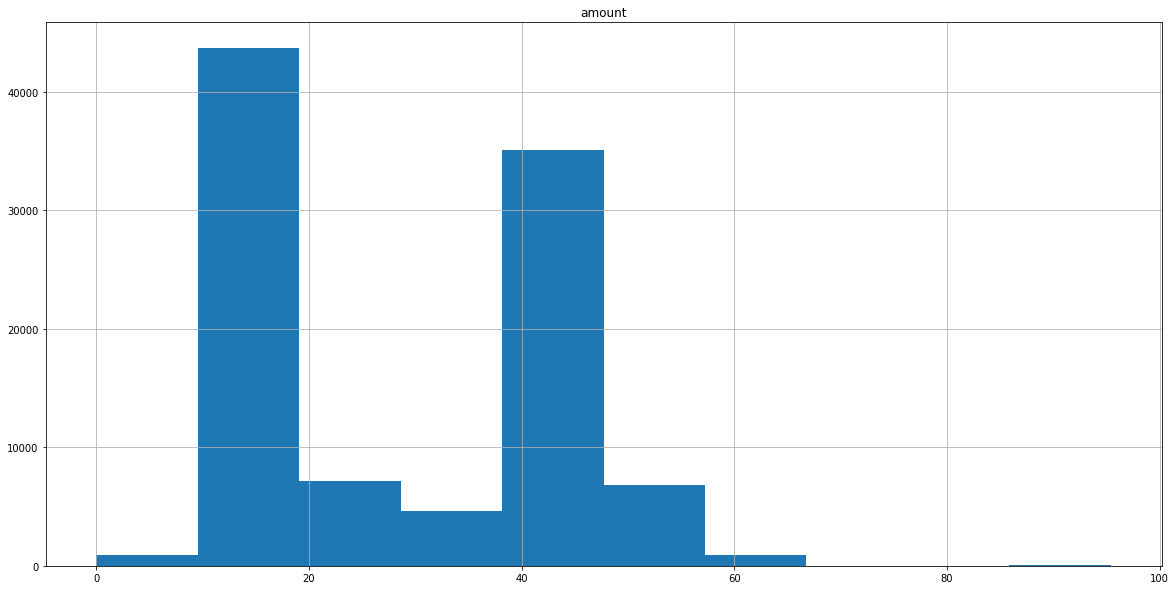

In [81]:
hist = clean_df.hist(column=['amount'], figsize=(20,10))
print (hist)

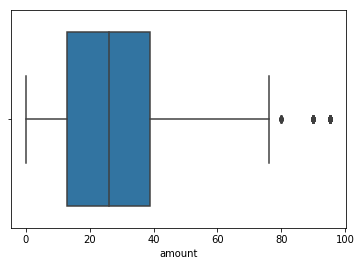

In [82]:
import seaborn as sns

# Same as using IQR guys
sns.boxplot(x=clean_df['amount'])

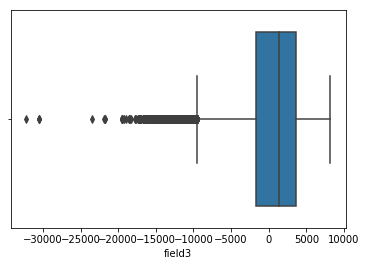

In [83]:
# Same as using IQR guys
sns.boxplot(x=clean_df['field3'])

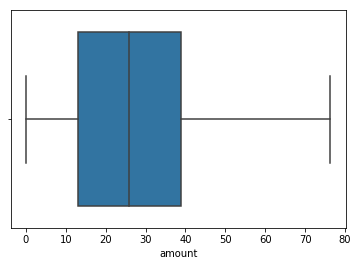

In [84]:
Q1 = clean_df['amount'].quantile(0.25)
Q3 = clean_df['amount'].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_df = clean_df
filter = (outlier_removed_df['amount'] >= Q1 - 1.5 * IQR) & (outlier_removed_df['amount'] <= Q3 + 1.5 *IQR)
outlier_removed_df = outlier_removed_df.loc[filter] 

sns.boxplot(x=outlier_removed_df['amount'])

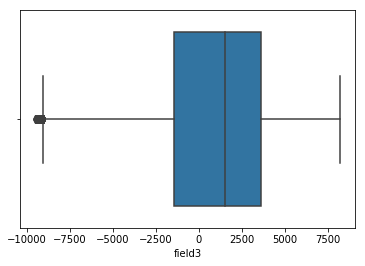

In [85]:
Q1 = clean_df['field3'].quantile(0.25)
Q3 = clean_df['field3'].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_df = clean_df
filter = (outlier_removed_df['field3'] >= Q1 - 1.5 * IQR) & (outlier_removed_df['field3'] <= Q3 + 1.5 *IQR)
outlier_removed_df = outlier_removed_df.loc[filter] 

sns.boxplot(x=outlier_removed_df['field3'])

In [86]:
clean_df = outlier_removed_df
outlier_removed_df.shape

(97826, 17)

## Split dataset

In [87]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(columns=['fraud'])
y = clean_df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [88]:
X_train

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1
28928,38.85,0,0,-1264,7,1,1,1,0,0,1,22,0,0,5,852
11457,38.85,3,0,5454,26,0,0,0,0,0,1,14,0,0,7,802
19982,12.95,3,1,5219,9,1,1,1,1,0,1,22,0,0,31,685
14601,25.90,3,0,-1333,10,0,1,0,0,0,1,7,0,0,2,368
747,38.85,2,0,-5055,19,0,0,1,1,0,2,17,0,0,6,926
83472,38.85,4,0,-1527,9,9,1,0,0,0,3,15,0,0,29,283
74819,12.95,3,0,-3781,8,0,1,1,1,0,1,20,0,0,26,641
13715,38.85,3,0,-4033,15,1,0,0,0,0,3,20,0,0,37,441
41857,38.85,3,0,4526,20,0,0,0,0,0,1,18,0,0,34,883
1062,24.95,3,0,2237,10,1,1,0,0,0,2,11,0,0,9,200


In [89]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(df_train)
# profile.to_file(output_file="PreprocessedProfilingResult.html")

## Oversampling & Undersampling

### Oversampling Approach

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_train_oversampling = X_train
y_train_oversampling = y_train
X_res, y_res = smote.fit_resample(X_train_oversampling, y_train_oversampling)

dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)
dataset_res.shape
dataset_res

In [ ]:
dataset_res[0]

In [ ]:
columns = X.columns.tolist()
columns.append('fraud')

oversampled_df = pd.DataFrame(dataset_res, columns=columns)
oversampled_df

In [ ]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(oversampled_df)
# profile.to_file(output_file="OversampledProfilingResult.html")

In [ ]:
oversampled_df['fraud'].value_counts()

### Undersampling Approach

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours 
from sklearn.datasets import make_classification
from collections import Counter

X_train_undersampling = X_train
y_train_undersampling = y_train
# print (y_train_undersampling)
print (X_train_undersampling.shape)

renn = RepeatedEditedNearestNeighbours (sampling_strategy='majority')
X_res, y_res = renn.fit_resample(X_train_undersampling, y_train_undersampling)
# print (y)
print (X_res.shape)

In [ ]:
dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)

undersampled_df = pd.DataFrame(dataset_res, columns=columns)
undersampled_df

In [ ]:
undersampled_df['fraud'].value_counts()

In [ ]:
y_train.value_counts()

### Hybrid Approach

In [106]:
from imblearn.combine import SMOTEENN

X_train_combine = X_train
y_train_combine = y_train

print (X_train_combine.shape)

sme = SMOTEENN(sampling_strategy='minority', ratio=0.8)
X_res, y_res = sme.fit_resample(X_train_combine, y_train_combine)

print (X_res.shape)

(73369, 16)
(56552, 16)


In [107]:
dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)

combined_df = pd.DataFrame(dataset_res, columns=columns)
combined_df

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
0,38.850000,0.000000,0.000000,-1264.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,5.000000,852.000000,0.0
1,25.900000,3.000000,0.000000,-1333.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,2.000000,368.000000,0.0
2,12.950000,3.000000,0.000000,-3781.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,0.000000,26.000000,641.000000,0.0
3,38.850000,3.000000,0.000000,-4033.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,37.000000,441.000000,0.0
4,38.850000,3.000000,0.000000,4526.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,34.000000,883.000000,0.0
5,38.850000,3.000000,0.000000,-977.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,6.000000,955.000000,0.0
6,38.850000,3.000000,0.000000,1463.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,44.000000,374.000000,0.0
7,12.950000,3.000000,0.000000,-942.000000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,925.000000,0.0
8,31.080000,2.000000,1.000000,4065.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,17.000000,606.000000,0.0
9,12.950000,3.000000,1.000000,7531.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,19.000000,402.000000,0.0


In [108]:
combined_df['fraud'].value_counts()

0.0    32598
1.0    23954
Name: fraud, dtype: int64

## Model and Evaluation

In [104]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score

# X = oversampled_df.drop(columns=['fraud']).to_numpy()
# y = oversampled_df['fraud']

# model = MultinomialNB(alpha=1e-10)

# kf = StratifiedKFold(n_splits=10)
# for train_index, test_index in kf.split(X, y):
#     X_train_model, X_validation_model = X[train_index], X[test_index]
#     y_train_model, y_validation_model = y[train_index], y[test_index]
#     model.fit(X_train_model, y_train_model)
#     predict = model.predict(X_validation_model)
#     print ("Accuracy\t", accuracy_score(y_validation_model, predict))

In [97]:
def show_history(history):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-97-7f2af1e6bc63>, line 16)

In [109]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = combined_df.drop(columns=['fraud']).to_numpy()
y = combined_df['fraud']

model = Sequential()
model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='linear'))
model.add(Dense(5, kernel_initializer='normal', activation='linear'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mae'])

kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X, y):
    X_train_model, X_validation_model = X[train_index], X[test_index]
    y_train_model, y_validation_model = y[train_index], y[test_index]
    history = model.fit(X_train_model, y_train_model, epochs=20, batch_size=10,  verbose=1)
    predict = model.predict_classes(X_validation_model)
    print ("Accuracy\t", accuracy_score(y_validation_model, predict))
    print(classification_report(y_validation_model, predict, target_names=['0', '1']))

Epoch 1/20
37701/37701 [==============================] - 5s 138us/step - loss: 0.2563 - accuracy: 0.5599 - mae: 0.4840
Epoch 2/20
37701/37701 [==============================] - 5s 136us/step - loss: 0.2335 - accuracy: 0.6047 - mae: 0.4653
Epoch 3/20
37701/37701 [==============================] - 6s 147us/step - loss: 0.2241 - accuracy: 0.6386 - mae: 0.4476
Epoch 4/20
37701/37701 [==============================] - 5s 146us/step - loss: 0.2219 - accuracy: 0.6476 - mae: 0.4427
Epoch 5/20
37701/37701 [==============================] - 6s 152us/step - loss: 0.2202 - accuracy: 0.6510 - mae: 0.4397
Epoch 6/20
37701/37701 [==============================] - 5s 133us/step - loss: 0.2192 - accuracy: 0.6535 - mae: 0.4377
Epoch 7/20
37701/37701 [==============================] - 5s 137us/step - loss: 0.2183 - accuracy: 0.6551 - mae: 0.4360
Epoch 8/20
37701/37701 [==============================] - 5s 142us/step - loss: 0.2180 - accuracy: 0.6552 - mae: 0.4350
Epoch 9/20
37701/37701 [================

In [110]:
from sklearn.metrics import classification_report

predict_test = model.predict_classes(X_test)
print ("Accuracy\t", accuracy_score(y_test, predict_test))
print(classification_report(y_test, predict_test, target_names=['0', '1']))

Accuracy	 0.6699922312630331
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     21515
           1       0.20      0.58      0.30      2942

    accuracy                           0.67     24457
   macro avg       0.56      0.63      0.54     24457
weighted avg       0.84      0.67      0.73     24457

